In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
# load dataset
df= pd.read_csv("fake news dataset.csv")
#df= pd.read_csv("news categorisation dataset.csv")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df["content"], df["label"], test_size = 0.3, shuffle=True, random_state=1)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizarion = TfidfVectorizer()
xv_train = vectorizarion.fit_transform(x_train.astype('U'))
xv_test = vectorizarion.transform(x_test.astype('U'))
# save vectorizor in a serial form
#pickle.dump(vectorizarion, open("vectorizer.pickle","wb"))

0.8492501973164956
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2258
           1       0.86      0.75      0.80      1543

    accuracy                           0.85      3801
   macro avg       0.85      0.83      0.84      3801
weighted avg       0.85      0.85      0.85      3801



Text(0.5, 1.0, 'Logistic Regression')

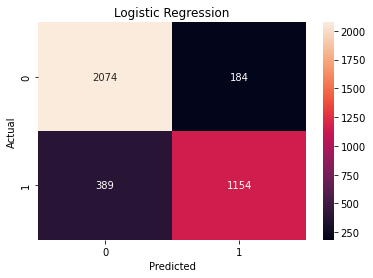

In [6]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

print(LR.score(xv_test, y_test))

predictLR = LR.predict(xv_test)
print(classification_report(y_test, predictLR))

cm = confusion_matrix(y_test,predictLR)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression')

0.7955801104972375
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2258
           1       0.77      0.71      0.74      1543

    accuracy                           0.80      3801
   macro avg       0.79      0.78      0.79      3801
weighted avg       0.79      0.80      0.79      3801



Text(0.5, 1.0, 'Decision Tree')

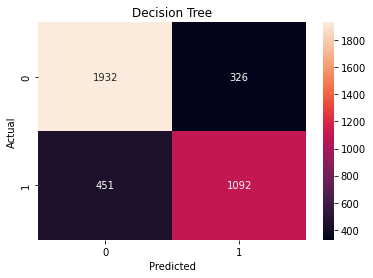

In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print(DT.score(xv_test, y_test))

predDT = DT.predict(xv_test)
print(classification_report(y_test, predDT))

cm = confusion_matrix(y_test,predDT)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree')

0.7958431991581163
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2258
           1       0.87      0.59      0.70      1543

    accuracy                           0.80      3801
   macro avg       0.82      0.76      0.77      3801
weighted avg       0.81      0.80      0.79      3801



Text(0.5, 1.0, 'Gradient Boosting')

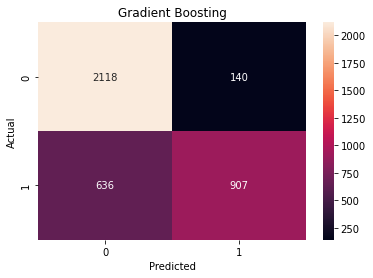

In [11]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)
print(GBC.score(xv_test,y_test))

predGBC = GBC.predict(xv_test)
print(classification_report(y_test, predGBC))

cm = confusion_matrix(y_test,predGBC)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting')

0.8481978426729808
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2258
           1       0.88      0.72      0.79      1543

    accuracy                           0.85      3801
   macro avg       0.86      0.83      0.84      3801
weighted avg       0.85      0.85      0.85      3801



Text(0.5, 1.0, 'Random Forest Classifier')

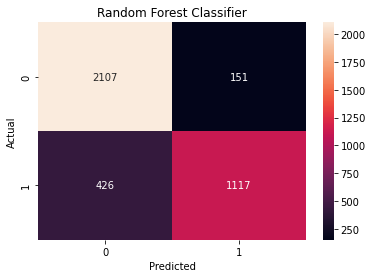

In [12]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)
print(RFC.score(xv_test,y_test))
predRFC = RFC.predict(xv_test)
print(classification_report(y_test, predRFC))

cm = confusion_matrix(y_test,predRFC)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier')

0.8602999210734017
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2258
           1       0.87      0.78      0.82      1543

    accuracy                           0.86      3801
   macro avg       0.86      0.85      0.85      3801
weighted avg       0.86      0.86      0.86      3801



Text(0.5, 1.0, 'SVM Baseline')

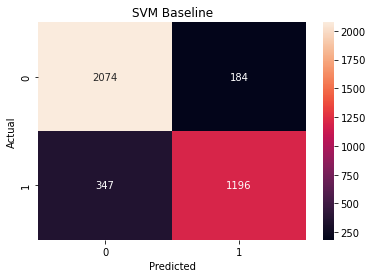

In [13]:
# SVM
from sklearn import svm
SVM = svm.SVC()
SVM.fit(xv_train,y_train)
print(SVM.score(xv_test,y_test))
predSVM = SVM.predict(xv_test)
SVMreport = (classification_report(y_test, predSVM))
print(SVMreport)

cm = confusion_matrix(y_test,predSVM)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Baseline')

In [14]:
# grid search
clf = GridSearchCV(svm.SVC(gamma="auto"), {
    "C":[1,10,20],
    "kernel": ["rbf","linear"]
}, cv=5, return_train_score=False)

clf.fit(xv_train,y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [15]:
svmdf = pd.DataFrame(clf.cv_results_)
svmdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.527702,0.065140,3.114589,0.039214,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.585663,0.585663,0.585334,0.585526,0.585526,0.585542,0.000121,4
1,9.382384,0.008194,1.728927,0.015762,1,linear,"{'C': 1, 'kernel': 'linear'}",0.856297,0.850378,0.848076,0.853618,0.849013,0.851477,0.003055,1
2,13.574096,0.062060,3.101382,0.021372,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.585663,0.585663,0.585334,0.585526,0.585526,0.585542,0.000121,4
3,17.919436,0.408297,1.447756,0.016671,10,linear,"{'C': 10, 'kernel': 'linear'}",0.839855,0.834265,0.837882,0.830263,0.835197,0.835493,0.003277,2
4,13.340821,0.372631,3.054789,0.104041,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.585663,0.585663,0.585334,0.585526,0.585526,0.585542,0.000121,4
5,19.271568,2.645511,1.423922,0.013393,20,linear,"{'C': 20, 'kernel': 'linear'}",0.840184,0.824729,0.832292,0.827632,0.831579,0.831283,0.005227,3


0.8514766610706312
1
linear


Text(0.5, 1.0, 'SVM C=1 Linear')

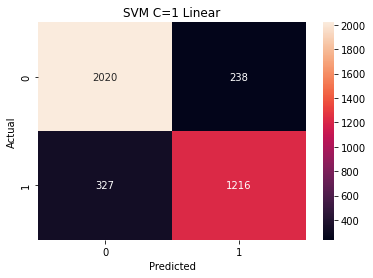

In [16]:
print(clf.best_score_)
print(clf.best_estimator_.C)
print(clf.best_estimator_.kernel)

clfPredict = clf.best_estimator_.predict(xv_test)
clfreport = (classification_report(y_test, clfPredict))
# clfreport = pd.DataFrame(clfreport)

cm = confusion_matrix(y_test,clfPredict)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM C=1 Linear')

[0.87, 0.89, 0.88]
[0.83, 0.81, 0.82]


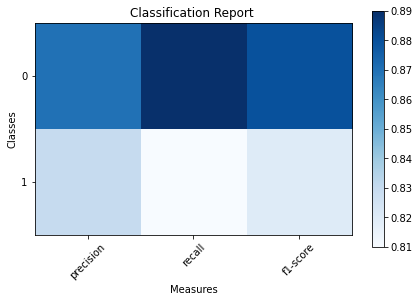

In [12]:
def plot_classification_report(cr, title='Classification Report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        if(len(t)==0):
            break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

plot_classification_report(SVMreport)

In [15]:
# import pickle
# pickle.dump(SVM, open("SVM trained model pickle","wb"))

In [16]:
# save model in serialised form
from joblib import dump, load
dump(SVM, "model.joblib")

['model.joblib']